In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(110)

#### Perceptron

In [2]:
def perceptron(X, weights, bias, max_iter=100000, eta=0.01):
    """
    Perceptron.

    :param data: data
    :param weights: initial weights
    :param bias: initial bias
    :param max_iter: maximum number of iterations
    :param eta: step size
    :return: computed weights, bias, number of iterations and number of weights updates
    """
    X_train = X[:, :-1]
    y_train = X[:,-1]
    w = np.copy(weights)
    b = bias
    n_iters = 0
    w_updates = 0
    # run perceptron
    while n_iters < max_iter:
        # make predictions
        yhat = np.sign(X_train.dot(w) + b)
        # check stop criteria
        if np.sum(y_train != yhat) == 0:
            break
        # update weights
        for i in range(len(y_train)):
            if y_train[i] * yhat[i] <= 0:
                w += eta * y_train[i] * X_train[i]
                b += eta * y_train[i]
                w_updates += 1
        n_iters += 1
    return w, b, n_iters, w_updates


def predict(X, weights, bias):
    """
    Perceptron prediction.

    :param X: data
    :param weights: weights
    :param bias: bias
    :return: prediction
    """
    yhat = np.sign(X.dot(weights) + bias)
    return yhat

In [3]:
def plot_perceptron(X, y, weights, bias):
    fig, ax = plt.subplots(figsize=(6,6))
    xmin, xmax = -3, 7
    ax.scatter(X[:, 0], X[:, 1], c=y)  
    intercept = -bias / weights[1]
    slope = -weights[0] / weights[1]
    X = np.arange(xmin, xmax, 0.1)
    ax.plot(X, slope * X + intercept, label='Weights: {}, bias: {:.3f}'.format(weights, bias))
    plt.title('The final equasion: {:.3f} * X + {:.3f}'.format(intercept, slope))
    plt.legend()

In [4]:
def generate_data(mu, cov, n_points_per_class):
    """
    Generate random dataset.

    :param mu: mean matrix
    :param cov: covariance matrix
    :param n_points_per_class: number of points for each class
    :return: dataset
    """
    data = []
    target = []
    x1 = np.random.multivariate_normal(mu[0], cov, n_points_per_class)
    x2 = np.random.multivariate_normal(mu[1], cov, n_points_per_class)
    data.append(np.vstack([x1,x2]))
    target=np.hstack([[-1]*n_points_per_class, [1]*n_points_per_class])
    data = np.concatenate(data)
    data = np.concatenate((data, target.reshape(-1, 1)), 1)
    return data

#### Create random data with size 50 (25 samples for positive and negative classes)

In [5]:
# linear separable dataset
covar=np.array([[ 1, 0], [0,  1]])
mu = np.array([[0, 0], [0, 5]])
train_data1 = generate_data(mu, covar, 25)
train_data_shuffled_1 = np.copy(train_data1)
np.random.shuffle(train_data_shuffled_1)

In [6]:
# linear non-separable dataset
covar=np.array([[ 1, 0], [0,  1]])
mu = np.array([[0, 0], [0, 2]])
train_data2 = generate_data(mu, covar, 25)
train_data_shuffled_2 = np.copy(train_data2)
np.random.shuffle(train_data_shuffled_2)

#### Create random data with size 30 (15 samples for positive and negative classes) for testing

In [7]:
covar=np.array([[ 1, 0], [0,  1]])
mu = np.array([[0, 0], [0, 5]])
test_data = generate_data(mu, covar, 15)
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# 1. How was generated the data points (training and test)

### To generate data, I've used multivariate normal distribution. In this way I can create linearly separable and non-separable datasets.

# 2. Whether the training data points are linearly separable

## To see, wheather the dataset is linaerly separable, lets plot the data

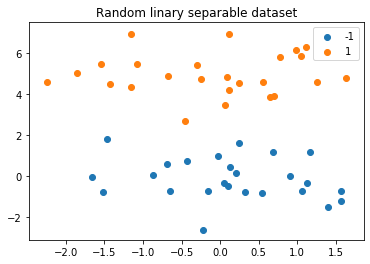

In [8]:
plt.scatter(train_data1[:25, 0], train_data1[:25, 1], label='-1')
plt.scatter(train_data1[25:, 0], train_data1[25:, 1], label='1')
plt.legend()
plt.title('Random linary separable dataset');

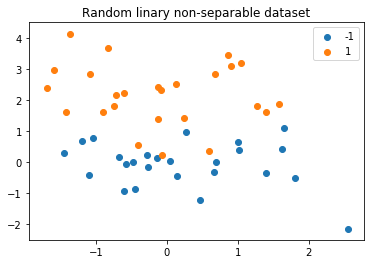

In [9]:
plt.scatter(train_data2[:25, 0], train_data2[:25, 1], label='-1')
plt.scatter(train_data2[25:, 0], train_data2[25:, 1], label='1')
plt.legend()
plt.title('Random linary non-separable dataset');

## With multivariate normal distribution by varying mean I've really got a datasets which are quite different. Thus, I've got two datasets for training (on the first plot linearly separable and on the second one - not).

# 3. Whether the test points are linearly separable

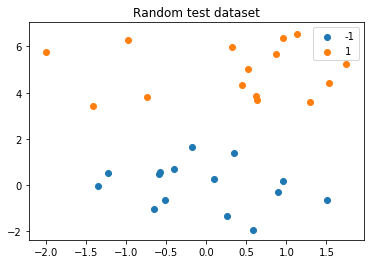

In [10]:
plt.scatter(test_data[:15, 0], test_data[:15, 1], label='-1')
plt.scatter(test_data[15:, 0], test_data[15:, 1], label='1')
plt.legend()
plt.title('Random test dataset');

### Testing data from is linearly separable

# I. The initial choice of the weights

#### Initialize weights: one set will be equal to 0, the other one from random uniform distribution. In both cases bias will be 0.

In [11]:
weights_zeros = np.zeros(2)
weights_random = np.random.uniform(size=2)
bias = 0

#### Running perceptron with initial weights and bias equal to 0 for training on linearly separable data

In [12]:
weights_from_zeros_1, bias_from_zeros_1, n_iters_from_zeros_1, n_updates_from_zeros_1 = perceptron(train_data_shuffled_1, weights_zeros, bias)

#### Running perceptron with initial weights and bias equal to 0 for training on linearly non-separable data

In [13]:
weights_from_zeros_2, bias_from_zeros_2, n_iters_from_zeros_2, n_updates_from_zeros_2 = perceptron(train_data_shuffled_2, weights_zeros, bias)

#### Running perceptron with initial weights from random uniform distribution for training on linearly separable data

In [14]:
weights_from_random_1, bias_from_random_1, n_iters_from_random_1, n_updates_from_random_1 = perceptron(train_data_shuffled_1, weights_random, bias)

#### Running perceptron with initial weights  from random uniform distribution for training on linearly non-separable data

In [15]:
weights_from_random_2, bias_from_random_2, n_iters_from_random_2, n_updates_from_random_2 = perceptron(train_data_shuffled_2, weights_random, bias)

## 4. Initial choice of the weights and constants

### I've tried to run algorithm with two variants of weights and bias initializing: first is weights are equal to 0, the second - weights are from uniform distribution. Bias in both cases is 0 and step size 0.01.

## 5. The final solution equation of the line (decision boundary)

#### Plot decision boundary for perceptron trained on linarly separable dataset and weights initialized as 0

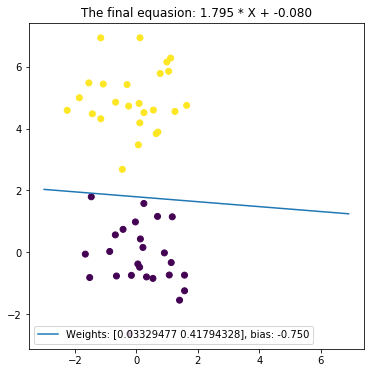

In [16]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_from_zeros_1, bias_from_zeros_1)

#### Plot decision boundary for perceptron trained on linarly non-separable dataset and weights initialized as 0

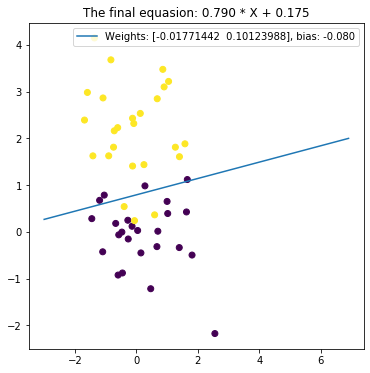

In [17]:
plot_perceptron(train_data2[:, :-1], train_data2[:, -1], weights_from_zeros_2, bias_from_zeros_2)

#### Plot decision boundary for perceptron trained on linarly non-separable dataset and weights initialized from random uniform

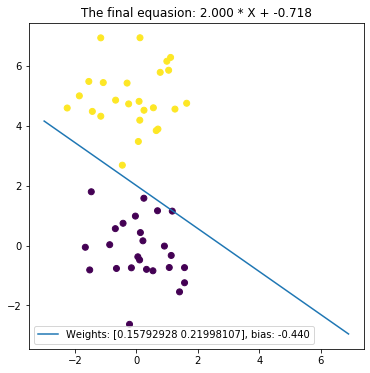

In [18]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_from_random_1, bias_from_random_1)

#### Plot decision boundary for perceptron trained on linarly non-separable dataset and weights initialized from random uniform

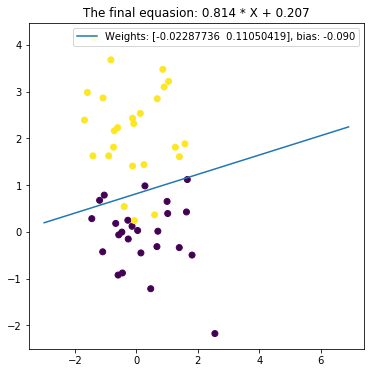

In [19]:
plot_perceptron(train_data2[:, :-1], train_data2[:, -1], weights_from_random_2, bias_from_random_2)

## 6. The total number of weight vector updates that algorithm made

#### Total number of updates of weights, which were initialized as 0

In [20]:
print('Total number of weights updates of the perceptron with linearly separable data: {}'.format(n_updates_from_zeros_1))
print('Total number of weights updates of the perceptron with non-linearly separable data: {}'.format(n_updates_from_zeros_2))

Total number of weights updates of the perceptron with linearly separable data: 125
Total number of weights updates of the perceptron with non-linearly separable data: 668828


#### Total number of updates of weights, which were initialized from random uniform

In [21]:
print('Total number of weights updates of the perceptron with linearly separable data: {}'.format(n_updates_from_random_1))
print('Total number of weights updates of the perceptron with non-linearly separable data: {}'.format(n_updates_from_random_2))

Total number of weights updates of the perceptron with linearly separable data: 44
Total number of weights updates of the perceptron with non-linearly separable data: 668689


# 7. The total number of iterations made over the training set

#### Total number of iterations of perceptron with weights, which were initialized as 0

In [22]:
print('Total number of iterations of the perceptron with linearly separable data: {}'.format(n_iters_from_zeros_1))
print('Total number of iterations of the perceptron with non-linearly separable data: {}'.format(n_iters_from_zeros_2))

Total number of iterations of the perceptron with linearly separable data: 15
Total number of iterations of the perceptron with non-linearly separable data: 100000


#### Total number of iterations of perceptron with weights, which were initialized from random uniform

In [23]:
print('Total number of iterations of the perceptron with linearly separable data: {}'.format(n_iters_from_random_1))
print('Total number of iterations of the perceptron with non-linearly separable data: {}'.format(n_iters_from_random_2))

Total number of iterations of the perceptron with linearly separable data: 8
Total number of iterations of the perceptron with non-linearly separable data: 100000


# 8. The final misclassification error, if any (expressed as a percentage), on the training data as well as on the test data

#### Misclassification for perceptron, which weights were initialized as 0

In [24]:
yhat_train1 = predict(train_data_shuffled_1[:, :-1], weights_from_zeros_1, bias_from_zeros_1)
yhat_test1 = predict(X_test, weights_from_zeros_1, bias_from_zeros_1)
train_error1 = (np.sum(train_data_shuffled_1[:, -1] != yhat_train1) / len(train_data1)) * 100
test_error1 = (np.sum(y_test != yhat_test1) / len(X_test)) * 100

yhat_train2 = predict(train_data_shuffled_2[:, :-1],  weights_from_zeros_2, bias_from_zeros_2)
yhat_test2 = predict(X_test,  weights_from_zeros_2, bias_from_zeros_2)
train_error2 = (np.sum(train_data_shuffled_2[:, -1] != yhat_train2) / len(train_data2)) * 100
test_error2 = (np.sum(y_test != yhat_test2) / len(X_test)) * 100

In [25]:
print('Percent of error for perceptron trained on linearly separable data:')
print('Train error: {}%'.format(train_error1))
print('Test error: {}%'.format(test_error1))
print('Percent of error for perceptron trained on non-linearly separable data:')
print('Train error: {}%'.format(train_error2))
print('Test error: {}%'.format(test_error2))

Percent of error for perceptron trained on linearly separable data:
Train error: 0.0%
Test error: 0.0%
Percent of error for perceptron trained on non-linearly separable data:
Train error: 14.000000000000002%
Test error: 6.666666666666667%


#### Misclassification for perceptron, which weights were initialized from random uniform

In [26]:
yhat_train1 = predict(train_data_shuffled_1[:, :-1], weights_from_random_1, bias_from_random_1)
yhat_test1 = predict(X_test, weights_from_random_1, bias_from_random_1)
train_error1 = (np.sum(train_data_shuffled_1[:, -1] != yhat_train1) / len(train_data1)) * 100
test_error1 = (np.sum(y_test != yhat_test1) / len(X_test)) * 100

yhat_train2 = predict(train_data_shuffled_2[:, :-1],  weights_from_random_2, bias_from_random_2)
yhat_test2 = predict(X_test,  weights_from_random_2, bias_from_random_2)
train_error2 = (np.sum(train_data_shuffled_2[:, -1] != yhat_train2) / len(train_data2)) * 100
test_error2 = (np.sum(y_test != yhat_test2) / len(X_test)) * 100

In [27]:
print('Percent of error for perceptron trained on linearly separable data:')
print('Train error: {}%'.format(train_error1))
print('Test error: {}%'.format(test_error1))
print('Percent of error for perceptron trained on non-linearly separable data:')
print('Train error: {}%'.format(train_error2))
print('Test error: {}%'.format(test_error2))

Percent of error for perceptron trained on linearly separable data:
Train error: 0.0%
Test error: 0.0%
Percent of error for perceptron trained on non-linearly separable data:
Train error: 12.0%
Test error: 6.666666666666667%


### We can see, that if dataset is linearly separable, it is not too important, how weights were initialized (we got the same train error rate in 0% and test error rate - 2%). But if perceptron trained on the non-linearly separable dataset, the random initialization of weights has much more influence. Thus, the algorithm needs lower amount of updates and its train error rate is lower: 12% error rate vs 14% error rate for perceptron trained with weights, initialized at random vs as 0. But test error rate is the same.

# II. The initial choice of the step size constant

### Initialize eta with different size

In [28]:
eta_1 = 0.001
eta_2 = 0.1
eta_3 = 1

In [29]:
weights_random = np.random.uniform(size=2)
bias = 0

#### Running perceptron with initial weights from random uniform and eta equal to 0.001 for training on linearly separable data

In [30]:
weights_1, bias_1, n_iters_1, n_updates_1 = perceptron(train_data_shuffled_1, weights_random, bias, eta=0.001)

#### Running perceptron with initial weights from random uniform and eta equal to 0.1 for training on linearly separable data

In [31]:
weights_2, bias_2, n_iters_2, n_updates_2 = perceptron(train_data_shuffled_1, weights_random, bias, eta=0.1)

#### Running perceptron with initial weights from random uniform and eta equal to 1 for training on linearly separable data

In [32]:
weights_3, bias_3, n_iters_3, n_updates_3 = perceptron(train_data_shuffled_1, weights_random, bias, eta=1)

#### Running perceptron with initial weights from random uniform and eta equal to 0.001 for training on non-linearly separable data

In [33]:
weights_4, bias_4, n_iters_4, n_updates_4 = perceptron(train_data_shuffled_2, weights_random, bias, eta=0.001)

#### Running perceptron with initial weights from random uniform and eta equal to 0.1 for training on non-linearly separable data

In [34]:
weights_5, bias_5, n_iters_5, n_updates_5 = perceptron(train_data_shuffled_2, weights_random, bias, eta=0.1)

#### Running perceptron with initial weights from random uniform and eta equal to 1 for training on non-linearly separable data

In [35]:
weights_6, bias_6, n_iters_6, n_updates_6 = perceptron(train_data_shuffled_2, weights_random, bias, eta=1)

## 5. The final solution equation of the line (decision boundary)

#### Plot decision boundary for perceptron trained on linarly separable dataset and eta = 0.001

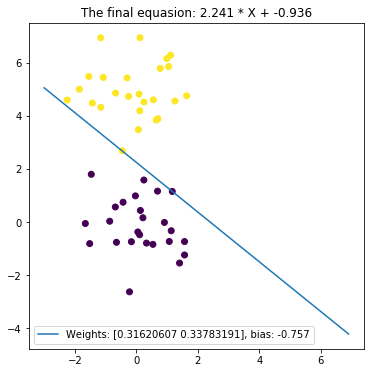

In [36]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_1, bias_1)

#### Plot decision boundary for perceptron trained on linarly non-separable dataset and eta = 0.001

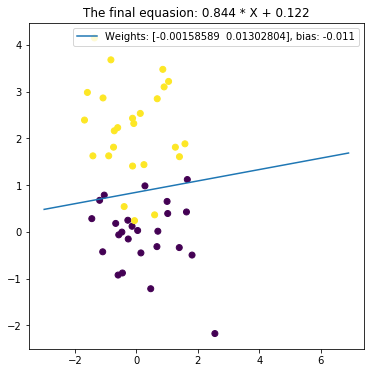

In [37]:
plot_perceptron(train_data2[:, :-1], train_data2[:, -1], weights_4, bias_4)

#### Plot decision boundary for perceptron trained on linarly separable dataset and eta = 0.1

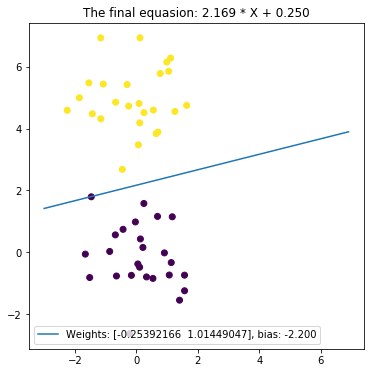

In [38]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_2, bias_2)

#### Plot decision boundary for perceptron trained on linarly non-separable dataset and eta = 0.1

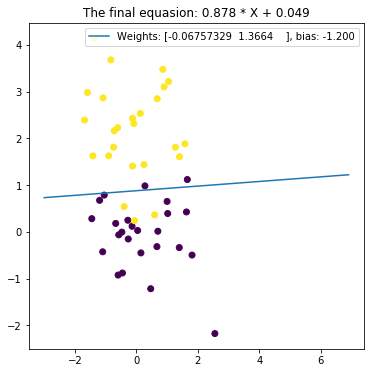

In [39]:
plot_perceptron(train_data2[:, :-1], train_data2[:, -1], weights_5, bias_5)

#### Plot decision boundary for perceptron trained on linarly separable dataset and eta = 1

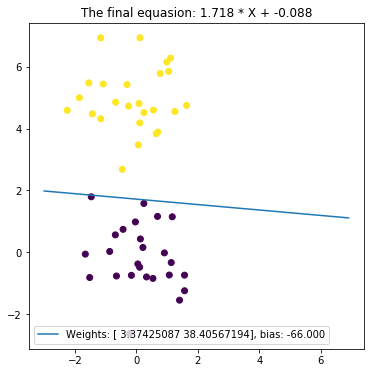

In [40]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_3, bias_3)

#### Plot decision boundary for perceptron trained on non-linarly separable dataset and eta = 1

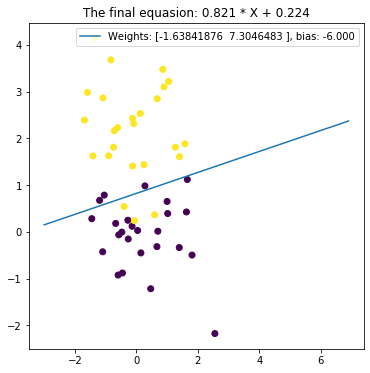

In [41]:
plot_perceptron(train_data2[:, :-1], train_data2[:, -1], weights_6, bias_6)

## 6. The total number of weight vector updates that algorithm made

#### Total number of updates of weights with eta=0.001

In [42]:
print('Total number of weights updates of the perceptron with linearly separable data: {}'.format(n_updates_1))
print('Total number of weights updates of the perceptron with non-linearly separable data: {}'.format(n_updates_4))

Total number of weights updates of the perceptron with linearly separable data: 783
Total number of weights updates of the perceptron with non-linearly separable data: 667909


#### Total number of updates of weights with eta=0.1

In [43]:
print('Total number of weights updates of the perceptron with linearly separable data: {}'.format(n_updates_2))
print('Total number of weights updates of the perceptron with non-linearly separable data: {}'.format(n_updates_5))

Total number of weights updates of the perceptron with linearly separable data: 34
Total number of weights updates of the perceptron with non-linearly separable data: 668768


#### Total number of updates of weights with eta=1

In [44]:
print('Total number of weights updates of the perceptron with linearly separable data: {}'.format(n_updates_3))
print('Total number of weights updates of the perceptron with non-linearly separable data: {}'.format(n_updates_6))

Total number of weights updates of the perceptron with linearly separable data: 116
Total number of weights updates of the perceptron with non-linearly separable data: 668574


# 7. The total number of iterations made over the training set

#### Total number of iterations of perceptron with eta=0.001

In [45]:
print('Total number of iterations of the perceptron with linearly separable data: {}'.format(n_iters_1))
print('Total number of iterations of the perceptron with non-linearly separable data: {}'.format(n_iters_4))

Total number of iterations of the perceptron with linearly separable data: 187
Total number of iterations of the perceptron with non-linearly separable data: 100000


#### Total number of iterations of perceptron with eta=0.1

In [46]:
print('Total number of iterations of the perceptron with linearly separable data: {}'.format(n_iters_2))
print('Total number of iterations of the perceptron with non-linearly separable data: {}'.format(n_iters_5))

Total number of iterations of the perceptron with linearly separable data: 5
Total number of iterations of the perceptron with non-linearly separable data: 100000


#### Total number of iterations of perceptron with eta=1

In [47]:
print('Total number of iterations of the perceptron with linearly separable data: {}'.format(n_iters_3))
print('Total number of iterations of the perceptron with non-linearly separable data: {}'.format(n_iters_6))

Total number of iterations of the perceptron with linearly separable data: 15
Total number of iterations of the perceptron with non-linearly separable data: 100000


# 8. The final misclassification error, if any (expressed as a percentage), on the training data as well as on the test data

#### Misclassification for perceptron with eta= 0.001

In [48]:
yhat_train1 = predict(train_data_shuffled_1[:, :-1], weights_1, bias_1)
yhat_test1 = predict(X_test, weights_1, bias_1)
train_error1 = (np.sum(train_data_shuffled_1[:, -1] != yhat_train1) / len(train_data1)) * 100
test_error1 = (np.sum(y_test != yhat_test1) / len(X_test)) * 100

yhat_train2 = predict(train_data_shuffled_2[:, :-1],  weights_4, bias_4)
yhat_test2 = predict(X_test,  weights_4, bias_4)
train_error2 = (np.sum(train_data_shuffled_2[:, -1] != yhat_train2) / len(train_data2)) * 100
test_error2 = (np.sum(y_test != yhat_test2) / len(X_test)) * 100

In [49]:
print('Percent of error for perceptron trained on linearly separable data:')
print('Train error: {}%'.format(train_error1))
print('Test error: {}%'.format(test_error1))
print('Percent of error for perceptron trained on non-linearly separable data:')
print('Train error: {}%'.format(train_error2))
print('Test error: {}%'.format(test_error2))

Percent of error for perceptron trained on linearly separable data:
Train error: 0.0%
Test error: 3.3333333333333335%
Percent of error for perceptron trained on non-linearly separable data:
Train error: 12.0%
Test error: 6.666666666666667%


#### Misclassification for perceptron with eta= 0.1

In [50]:
yhat_train1 = predict(train_data_shuffled_1[:, :-1], weights_2, bias_2)
yhat_test1 = predict(X_test, weights_2, bias_2)
train_error1 = (np.sum(train_data_shuffled_1[:, -1] != yhat_train1) / len(train_data1)) * 100
test_error1 = (np.sum(y_test != yhat_test1) / len(X_test)) * 100

yhat_train2 = predict(train_data_shuffled_2[:, :-1],  weights_5, bias_5)
yhat_test2 = predict(X_test,  weights_5, bias_5)
train_error2 = (np.sum(train_data_shuffled_2[:, -1] != yhat_train2) / len(train_data2)) * 100
test_error2 = (np.sum(y_test != yhat_test2) / len(X_test)) * 100

In [51]:
print('Percent of error for perceptron trained on linearly separable data:')
print('Train error: {}%'.format(train_error1))
print('Test error: {}%'.format(test_error1))
print('Percent of error for perceptron trained on non-linearly separable data:')
print('Train error: {}%'.format(train_error2))
print('Test error: {}%'.format(test_error2))

Percent of error for perceptron trained on linearly separable data:
Train error: 0.0%
Test error: 0.0%
Percent of error for perceptron trained on non-linearly separable data:
Train error: 10.0%
Test error: 6.666666666666667%


#### Misclassification for perceptron with eta= 1

In [52]:
yhat_train1 = predict(train_data_shuffled_1[:, :-1], weights_3, bias_3)
yhat_test1 = predict(X_test, weights_3, bias_3)
train_error1 = (np.sum(train_data_shuffled_1[:, -1] != yhat_train1) / len(train_data1)) * 100
test_error1 = (np.sum(y_test != yhat_test1) / len(X_test)) * 100

yhat_train2 = predict(train_data_shuffled_2[:, :-1],  weights_6, bias_6)
yhat_test2 = predict(X_test,  weights_6, bias_6)
train_error2 = (np.sum(train_data_shuffled_2[:, -1] != yhat_train2) / len(train_data2)) * 100
test_error2 = (np.sum(y_test != yhat_test2) / len(X_test)) * 100

In [53]:
print('Percent of error for perceptron trained on linearly separable data:')
print('Train error: {}%'.format(train_error1))
print('Test error: {}%'.format(test_error1))
print('Percent of error for perceptron trained on non-linearly separable data:')
print('Train error: {}%'.format(train_error2))
print('Test error: {}%'.format(test_error2))

Percent of error for perceptron trained on linearly separable data:
Train error: 0.0%
Test error: 0.0%
Percent of error for perceptron trained on non-linearly separable data:
Train error: 12.0%
Test error: 6.666666666666667%


## The best results were achieved with eta=0.01 or greater. 

# III. The order in which are considered the points in the training set.

### Train perceptron on data which is not shuffled with weights initialized at random and eta=0.1

In [54]:
weights_random = np.random.uniform(size=2)
bias = 0

#### Running perceptron for training on linearly separable data shuffled

In [55]:
weights_1, bias_1, n_iters_1, n_updates_1 = perceptron(train_data_shuffled_1, weights_random, bias, eta=0.1)

#### Running perceptron for training on linearly separable data unshuffled

In [56]:
weights_2, bias_2, n_iters_2, n_updates_2 = perceptron(train_data1, weights_random, bias, eta=0.1)

#### Running perceptron for training on linearly non-separable data shuffled

In [57]:
weights_3, bias_3, n_iters_3, n_updates_3 = perceptron(train_data_shuffled_2, weights_random, bias, eta=0.1)

#### Running perceptron for training on linearly non-separable data unshuffled

In [58]:
weights_4, bias_4, n_iters_4, n_updates_4 = perceptron(train_data2, weights_random, bias, eta=0.1)

## 5. The final solution equation of the line (decision boundary)

#### Plot decision boundary for perceptron trained on linarly separable dataset shuffled

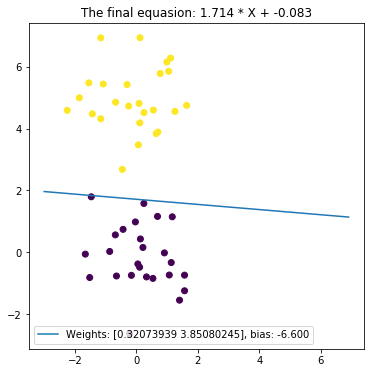

In [59]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_1, bias_1)

#### Plot decision boundary for perceptron trained on linarly separable dataset unshuffled

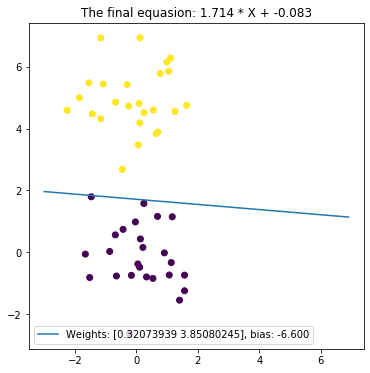

In [60]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_2, bias_2)

#### Plot decision boundary for perceptron trained on linarly non-separable dataset shuffled

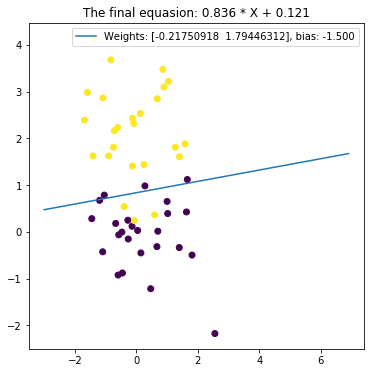

In [61]:
plot_perceptron(train_data2[:, :-1], train_data2[:, -1], weights_3, bias_3)

#### Plot decision boundary for perceptron trained on linarly non-separable dataset unshuffled

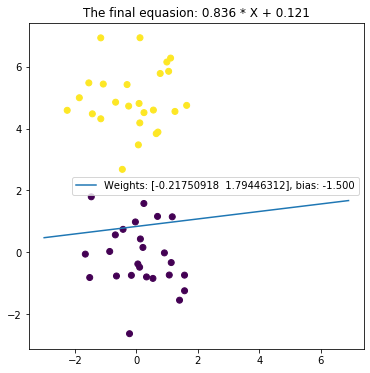

In [62]:
plot_perceptron(train_data1[:, :-1], train_data1[:, -1], weights_4, bias_4)

### Equations are the same for datasets which were shuffled and not

## 6. The total number of weight vector updates that algorithm made

#### Total number of updates of weights

In [63]:
print('Total number of weights updates of the perceptron with linearly separable data shuffled: {}'.format(n_updates_1))
print('Total number of weights updates of the perceptron with non-linearly separable data shuffled: {}'.format(n_updates_3))

Total number of weights updates of the perceptron with linearly separable data shuffled: 116
Total number of weights updates of the perceptron with non-linearly separable data shuffled: 668751


In [64]:
print('Total number of weights updates of the perceptron with linearly separable data unshuffled: {}'.format(n_updates_2))
print('Total number of weights updates of the perceptron with non-linearly separable data unshuffled: {}'.format(n_updates_4))

Total number of weights updates of the perceptron with linearly separable data unshuffled: 116
Total number of weights updates of the perceptron with non-linearly separable data unshuffled: 668751


# 7. The total number of iterations made over the training set

#### Total number of iterations of perceptron

In [65]:
print('Total number of iterations of the perceptron with linearly separable data shuffled: {}'.format(n_iters_1))
print('Total number of iterations of the perceptron with non-linearly separable data shuffled: {}'.format(n_iters_3))

Total number of iterations of the perceptron with linearly separable data shuffled: 15
Total number of iterations of the perceptron with non-linearly separable data shuffled: 100000


In [66]:
print('Total number of iterations of the perceptron with linearly separable data unshuffled: {}'.format(n_iters_2))
print('Total number of iterations of the perceptron with non-linearly separable data unshuffled: {}'.format(n_iters_4))

Total number of iterations of the perceptron with linearly separable data unshuffled: 15
Total number of iterations of the perceptron with non-linearly separable data unshuffled: 100000


# 8. The final misclassification error, if any (expressed as a percentage), on the training data as well as on the test data

#### Misclassification for perceptron trained on shuffled data

In [67]:
yhat_train1 = predict(train_data_shuffled_1[:, :-1], weights_1, bias_1)
yhat_test1 = predict(X_test, weights_1, bias_1)
train_error1 = (np.sum(train_data_shuffled_1[:, -1] != yhat_train1) / len(train_data1)) * 100
test_error1 = (np.sum(y_test != yhat_test1) / len(X_test)) * 100

yhat_train2 = predict(train_data_shuffled_2[:, :-1],  weights_3, bias_3)
yhat_test2 = predict(X_test,  weights_3, bias_3)
train_error2 = (np.sum(train_data_shuffled_2[:, -1] != yhat_train2) / len(train_data2)) * 100
test_error2 = (np.sum(y_test != yhat_test2) / len(X_test)) * 100

In [68]:
print('Percent of error for perceptron trained on linearly separable data shuffled:')
print('Train error: {}%'.format(train_error1))
print('Test error: {}%'.format(test_error1))
print('Percent of error for perceptron trained on non-linearly separable data shuffled:')
print('Train error: {}%'.format(train_error2))
print('Test error: {}%'.format(test_error2))

Percent of error for perceptron trained on linearly separable data shuffled:
Train error: 0.0%
Test error: 0.0%
Percent of error for perceptron trained on non-linearly separable data shuffled:
Train error: 12.0%
Test error: 6.666666666666667%


#### Misclassification for perceptron trained on unshuffled data

In [69]:
yhat_train1 = predict(train_data1[:, :-1], weights_2, bias_2)
yhat_test1 = predict(X_test, weights_2, bias_2)
train_error1 = (np.sum(train_data1[:, -1] != yhat_train1) / len(train_data1)) * 100
test_error1 = (np.sum(y_test != yhat_test1) / len(X_test)) * 100

yhat_train2 = predict(train_data2[:, :-1],  weights_4, bias_4)
yhat_test2 = predict(X_test,  weights_4, bias_4)
train_error2 = (np.sum(train_data2[:, -1] != yhat_train2) / len(train_data2)) * 100
test_error2 = (np.sum(y_test != yhat_test2) / len(X_test)) * 100

In [70]:
print('Percent of error for perceptron trained on linearly separable data unshuffled:')
print('Train error: {}%'.format(train_error1))
print('Test error: {}%'.format(test_error1))
print('Percent of error for perceptron trained on non-linearly separable data unshuffled:')
print('Train error: {}%'.format(train_error2))
print('Test error: {}%'.format(test_error2))

Percent of error for perceptron trained on linearly separable data unshuffled:
Train error: 0.0%
Test error: 0.0%
Percent of error for perceptron trained on non-linearly separable data unshuffled:
Train error: 12.0%
Test error: 6.666666666666667%


## For this algorithm it is not important to shuffle data - results are the same